In [ ]:
# Computer Vision and pattern Recognition Sec (A) 
# Assignment (Mid)
# MD MUSTAFIZUR RAHMAN
# ID:17-34272-1


import numpy as np
import matplotlib.pyplot as plt

import pickle
import os
import platform


%matplotlib inline

In [2]:
#Created K-NN Class(Function) to use this later to call this function with a object
class KNearestNeighbor(object):
    def __init__(self):
        pass
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X, k=1, num_loops=0):
        if num_loops == 0:
            dists = self.compute_distances(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)
        return self.predict_labels(dists, k=k)


    def compute_distances(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        # This distance is calculated using NO LOOPS , ALSO HAVE a ONE LOOP and Two LOOP to calculated, this is efficience
        dists = np.sqrt(np.sum(np.square(self.X_train), axis=1) + np.sum(np.square(X), axis=1)[:, np.newaxis] - 2 * np.dot(X, self.X_train.T))
        pass
        return dists

    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            sorted_dist = np.argsort(dists[i])
            #making a sorted list of predicted labels
            closest_y = list(self.y_train[sorted_dist[0:k]])
            pass
            y_pred[i]= (np.argmax(np.bincount(closest_y)))
            pass
        return y_pred

In [4]:
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))

def load_CIFAR_batch(filename):
   # loading single batch of cifar
  with open(filename, 'rb') as f:
    datadict = load_pickle(f)
    X = datadict['data']
    Y = datadict['labels']
    #X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    Y = np.array(Y)
    return X, Y

def load_CIFAR10(ROOT):
   # loading all cifar
  xs = []
  ys = []
  for b in range(1,6):
    f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
    X, Y = load_CIFAR_batch(f)
    #X, Y = load_CIFAR10(f)
    xs.append(X)
    ys.append(Y)    
  Xtr = np.concatenate(xs)
  Ytr = np.concatenate(ys)
  del X, Y
  Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
  return Xtr, Ytr, Xte, Yte

In [5]:
#cifar10_dir = './data/cifar-10-batches-py/'
cifar10_dir = 'D:/Computer Vision And Pattern Recognition/mid/cifar-10-batches-py/'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# Checking the size of the training and testing data
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 3072)
Training labels shape:  (50000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)


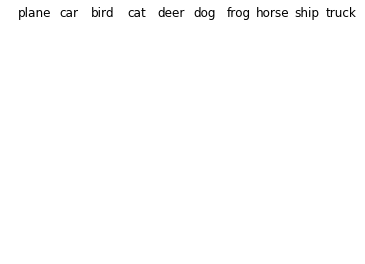

In [8]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        #plt.imshow(X_train[idx].astype('uint8'))
        #plt.imshow(X_train[idx].astype('uint12'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [9]:
# Memory error prevention by subsampling data

num_training = 10000
#num_training = 50000
#num_training = 40000
#num_training = 30000
#num_training = 20000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 1000
#num_test = 10000
#num_test = 5000
#num_test = 100
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [10]:
# reshaping data and placing into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(10000, 3072) (1000, 3072)


In [11]:
#creating class KNN object to use it 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
dists= classifier.compute_distances(X_test)
y_test_pred = classifier.predict_labels(dists, k=5) # here passing k=5 to test
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 103 / 1000 correct => accuracy: 0.103000


In [13]:
# This is our Cross Validation and Accuracy Calculation Part
#Number of fold is 5 here, and the number of folder is bigger is better for certain dataset, not for all

num_folds = 5
#k_choices = [1, 3, 5, 8, 10]
#k_choices = [1, 3, 5, 20, 50, 100]
#k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
k_choices = [1,2, 3,4, 5,6,7, 8,9, 10,11, 12,13,14, 15,16,17,18,19, 20]

X_train_folds = []
y_train_folds = []

X_train_folds = np.array_split(X_train,num_folds)
y_train_folds = np.array_split(y_train,num_folds)
k_to_accuracies = {}



for k in k_choices:
    k_to_accuracies[k] = []
    for num_knn in range(0,num_folds):
        X_test = X_train_folds[num_knn]
        y_test = y_train_folds[num_knn]
        X_train = X_train_folds
        y_train = y_train_folds
        
        temp = np.delete(X_train,num_knn,0)
        X_train = np.concatenate((temp),axis = 0)
        y_train = np.delete(y_train,num_knn,0)
        y_train = np.concatenate((y_train),axis = 0)
        
        classifier = KNearestNeighbor()
        classifier.train(X_train, y_train)
        dists = classifier.compute_distances(X_test)
        y_test_pred = classifier.predict_labels(dists, k)

        num_correct = np.sum(y_test_pred == y_test)
        accuracy = float(num_correct) / num_test
#         print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))
        k_to_accuracies[k].append(accuracy)


print("Printing our 5-fold accuracies for varying values of k:")
print()
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

Printing our 5-fold accuracies for varying values of k:

k = 1, accuracy = 0.203000
k = 1, accuracy = 0.217000
k = 1, accuracy = 0.214000
k = 1, accuracy = 0.198000
k = 1, accuracy = 0.215000
k = 2, accuracy = 0.202000
k = 2, accuracy = 0.194000
k = 2, accuracy = 0.214000
k = 2, accuracy = 0.186000
k = 2, accuracy = 0.209000
k = 3, accuracy = 0.202000
k = 3, accuracy = 0.194000
k = 3, accuracy = 0.214000
k = 3, accuracy = 0.186000
k = 3, accuracy = 0.209000
k = 4, accuracy = 0.202000
k = 4, accuracy = 0.194000
k = 4, accuracy = 0.214000
k = 4, accuracy = 0.186000
k = 4, accuracy = 0.209000
k = 5, accuracy = 0.202000
k = 5, accuracy = 0.194000
k = 5, accuracy = 0.214000
k = 5, accuracy = 0.186000
k = 5, accuracy = 0.209000
k = 6, accuracy = 0.202000
k = 6, accuracy = 0.194000
k = 6, accuracy = 0.214000
k = 6, accuracy = 0.186000
k = 6, accuracy = 0.209000
k = 7, accuracy = 0.202000
k = 7, accuracy = 0.194000
k = 7, accuracy = 0.214000
k = 7, accuracy = 0.186000
k = 7, accuracy = 0.20900

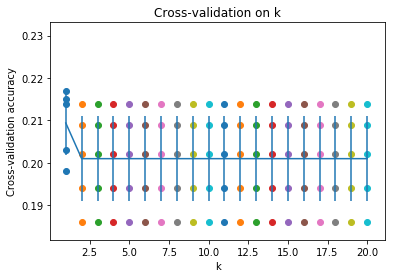

In [14]:
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# ploting the trend line with error bars that correspond to standard deviation

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()